#### Importing Libraries

In [15]:
import warnings 
warnings.filterwarnings('ignore')  
from scipy import stats 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Loading Dataset

In [18]:
flight_data= pd.read_excel('Flight dataset.xlsx') 
flight_data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


#### To Preview First Few Rows

In [21]:
flight_data.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [23]:
#checking missing values
flight_data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#### To Identify the Variables for Two Way ANOVA

##### Dependent Variable : The column values which is to be understood.
##### Taken price as dependent variable.

##### Independent Variable  : The categorical column is to tested whether to see if they affect dependent variable or not.
##### Taken columns are,
#####       1.Airline(for different airlines)
#####       2.Stops(whether the flight is direct or has a stop)

#### In this Case, Two Way ANOVA will help to understand

##### ----> If there is an interaction between airline and stops that affects prices.

#### How Airline and stop affects Price?

##### The model: price as a function of airline and stops, with interaction

In [31]:
model = ols('price ~ C(airline) + C(stops) + C(airline)*C(stops)', data=flight_data).fit()
model

##### Two-way ANOVA

In [34]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq        df             F  PR(>F)
C(airline)           3.339746e+13       5.0  17300.057506     0.0
C(stops)             4.448800e+12       2.0   5761.254195     0.0
C(airline):C(stops)  1.707567e+12      10.0    442.264154     0.0
Residual             1.158815e+14  300136.0           NaN     NaN


##### Interaction plot between Airline and Stops on Price

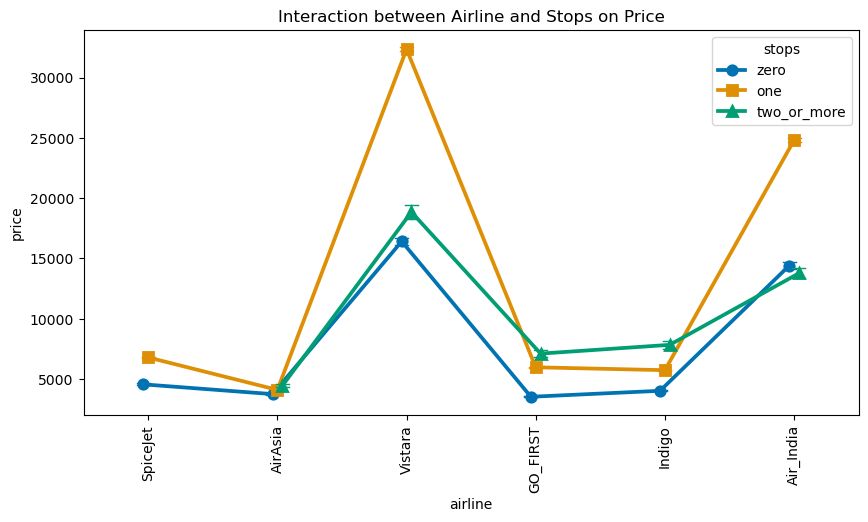

In [37]:
plt.figure(figsize=(10, 5))
sns.pointplot(x='airline', y='price', hue='stops', data=flight_data, dodge=True, 
              markers=['o', 's', '^'], 
              capsize=.1, errwidth=1, palette='colorblind')
plt.title('Interaction between Airline and Stops on Price')
plt.xticks(rotation=90)
plt.show()

##### ---> The p-value for C(airline) is 0.0 which is less than 0.05, so the choice of airline significantly affects the price.
##### ---> The p-value for C(stops) is 0.0 which is less than 0.05, so having a stopver also significantly affects the price.
##### ---> The p-value for C(airline)*(stops) is 0.0 which means the interaction between airline and stops is significant

##### Therefore, the effect of the airline on price depends on whether the flight has stop or not.